In [8]:
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# Define the figure size and dpi
fig_width = 6.9  # inches
fig_height = 3.5  # inches
fig_dpi = 350

plt.rcParams.update({
    'figure.figsize': (fig_width, fig_height),
    'figure.dpi': fig_dpi,

    # Fonts
    'font.size': 18,

    # Axes
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'axes.linewidth': 1,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 1,
    'grid.color': 'gray',

    # Legend
    'legend.fontsize': 8,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fancybox': False,
    'legend.edgecolor': 'gray',
    'legend.facecolor': 'white',
    'legend.borderaxespad': 0.5,
    'legend.borderpad': 0.4,
    'legend.labelspacing': 0.5,

    # Lines
    'lines.linewidth': 2.0,
    'lines.markersize': 2,
    'axes.labelsize': 10,
    'axes.titlesize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
})

In [10]:
path_models = pathlib.Path(
    "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet"
)

tpcs_eval = [5,10]

info_eval = {
    "ntopics": tpcs_eval,
    "cohrs_mean": [],
    "cohrs_var" : [],
    "disp_perc_mean": [],
    "disp_perc_var": []
}
for tpc in tpcs_eval:
    path_model = path_models / f"Mallet_{tpc}_topics" / "model_data" / "TMmodel"
    cohrs = np.load(path_model.joinpath('topic_coherence.npy'))
    info_eval["cohrs_mean"].append(np.mean(cohrs))
    info_eval["cohrs_var"].append(np.std(cohrs))
    thetas = sparse.load_npz(path_model.joinpath('thetas.npz'))
    disp_perc = 100 * ((thetas.shape[0] * thetas.shape[1]) - len(thetas.data)) / (thetas.shape[0] * thetas.shape[1])
    info_eval["disp_perc_mean"].append(np.mean(disp_perc))
    info_eval["disp_perc_var"].append(np.std(disp_perc))

info_eval_df = pd.DataFrame(info_eval)
info_eval_df

,ntopics,cohrs_mean,cohrs_var,disp_perc_mean,disp_perc_var
0,5,0.375832,0.021252,8.434454,0.0
1,10,0.397900,0.133638,34.185116,0.0


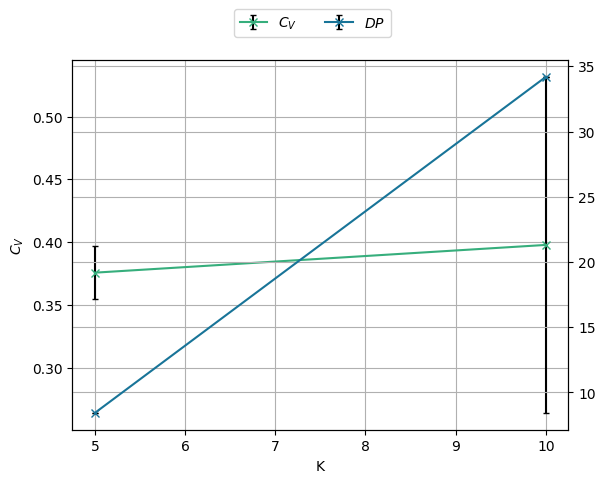

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=1)

axs.errorbar(
    info_eval_df['ntopics'],
    info_eval_df['cohrs_mean'],
    yerr=info_eval_df['cohrs_var'],
    fmt='x-',
    ecolor='black',
    capsize=2,
    color='#36AE7C',
    label='$C_{V}$')

ax2 = axs.twinx()
ax2.errorbar(
    info_eval_df['ntopics'],
    info_eval_df['disp_perc_mean'],
    yerr=info_eval_df['disp_perc_var'], 
    fmt='x-',
    ecolor='black',
    capsize=2,
    color='#187498',
    label='$DP$')

axs.grid(True)
axs.set_xlabel('K')
axs.set_ylabel('$C_{V}$')
#axs.set_title(title)
ax2.grid(True)

handles_all, labels_all = axs.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

fig.legend(handles_all+handles2, labels_all+labels2, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1),
           frameon=True, shadow=False)